# **Hospital Readmission**


#**Background**
The goal of this project is to build a model that will predict whether a patient will be readmitted in some hospital.
* Reference - https://www.kaggle.com/brandao/diabetes

  The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. 

# **Import Libraries**

In [ ]:
!pip install pydot
import pydot
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sys
import warnings

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss, f1_score, balanced_accuracy_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer, PowerTransformer, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, f_classif

from imblearn.over_sampling import SMOTE
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Import Data**

In [ ]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# handle missing values
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][(df[col] == '?') | (df[col] == 'NaN') | (df[col] == 'Unknown/Invalid')].count())

race 2273
gender 3
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# drop columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [ ]:
# drop rows with missing values
drop_index = set(df[(df['diag_1'] == '?') | (df['diag_2'] == '?') | (df['diag_3'] == '?') |\
                    (df['diag_1'] == 'NaN') | (df['diag_2'] == 'NaN') | (df['diag_3'] == 'NaN') |\
                    (df['diag_1'] == 'Unknown/Invalid') | (df['diag_2'] == 'Unknown/Invalid') | (df['diag_3'] == 'Unknown/Invalid')].index)
drop_index = drop_index.union(set(df['race'][(df['race'] == '?') |\
                                             (df['race'] == 'NaN') |\
                                             (df['race'] == 'Unknown/Invalid')].index))
drop_index = drop_index.union(set(df['gender'][(df['gender'] == '?') |\
                                             (df['gender'] == 'NaN') |\
                                             (df['gender'] == 'Unknown/Invalid')].index))
new_index = list(set(df.index) - set(drop_index))
df = df.iloc[new_index]

In [ ]:
df.nunique()

encounter_id                98052
patient_nbr                 68629
race                            5
gender                          2
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
num_lab_procedures            118
num_procedures                  7
num_medications                75
number_outpatient              39
number_emergency               33
number_inpatient               20
diag_1                        713
diag_2                        740
diag_3                        786
number_diagnoses               14
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide   

In [ ]:
# drop rows with NA or dupliacted or with same values
df.dropna(axis=0, inplace = True)
df.drop_duplicates(inplace = True)
df.drop(['citoglipton', 'examide'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98052 non-null  int64 
 1   patient_nbr               98052 non-null  int64 
 2   race                      98052 non-null  object
 3   gender                    98052 non-null  object
 4   age                       98052 non-null  object
 5   admission_type_id         98052 non-null  int64 
 6   discharge_disposition_id  98052 non-null  int64 
 7   admission_source_id       98052 non-null  int64 
 8   time_in_hospital          98052 non-null  int64 
 9   num_lab_procedures        98052 non-null  int64 
 10  num_procedures            98052 non-null  int64 
 11  num_medications           98052 non-null  int64 
 12  number_outpatient         98052 non-null  int64 
 13  number_emergency          98052 non-null  int64 
 14  number_inpatient     

# **Feature Engineering**

**Readmitted column**

In [ ]:
# display readmitted distribution
df['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [ ]:
# encoding readmitted variable (whether patient gets readmitted within 30 days)
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

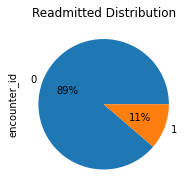

In [ ]:
# display new readmitted distribution
f, plot = plt.subplots(figsize=(4, 3))
plot = df.groupby(['readmitted'])['encounter_id'].count().plot(kind='pie',autopct='%1.f%%')
plt.title('Readmitted Distribution')
plot

**Age column**

In [ ]:
# display age distribution
df['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [ ]:
# encoding age variable (from string to mid age)
mid_age = df['age'].str.split('-').str[1].str.split(')').str[0].astype(np.int64)-5
df['age'] = mid_age

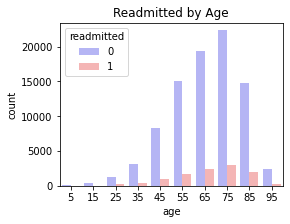

In [ ]:
# display mid age distribution
f, plot = plt.subplots(figsize=(4, 3))
plot = sns.countplot(x="age", data=df, hue="readmitted", palette="bwr")
plot.set_title("Readmitted by Age")
plt.show()

**Gender column**

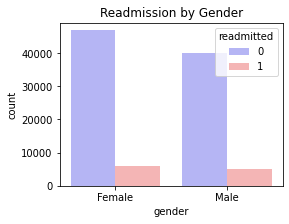

In [ ]:
f, plot = plt.subplots(figsize=(4, 3))
plot = sns.countplot(x="gender", data=df, hue="readmitted", palette="bwr")
plot.set_title("Readmission by Gender")
plt.show()

**Time in Hospital column**

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

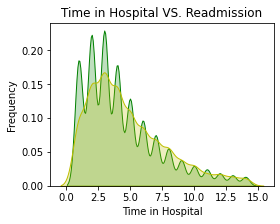

In [ ]:
# display time in hospital distribution
f, plot = plt.subplots(figsize=(4, 3))
plot = sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='g',shade=True,label='Not Readmitted')
plot = sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='y',shade=True, label='Readmitted')
plot.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

**Race column**

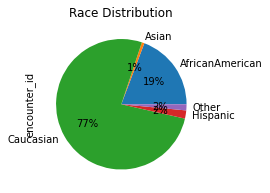

In [ ]:
# display race distribution
f, plot = plt.subplots(figsize=(4, 3))
plot = df.groupby(['race'])['encounter_id'].count().plot(kind='pie',autopct='%1.f%%')
plt.title('Race Distribution')
plot

In [ ]:
# encoding race variable
df.race.replace({'Caucasian': 0.77, 'AfricanAmerican': 0.19, 'Asian': 0.01,'Hispanic':0.02,'Other':0.02},inplace=True)

**Admission Source column**

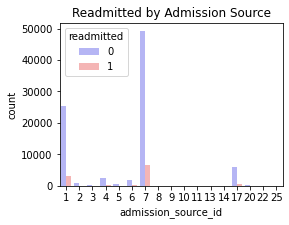

In [ ]:
# display admision source 
# for example: 1-physician reffer, 7-emergency room, etc.
f, plot = plt.subplots(figsize=(4, 3))
plot = sns.countplot(x="admission_source_id", data=df, hue="readmitted", palette="bwr")
plot.set_title("Readmitted by Admission Source")
plt.show()

In [ ]:
# encoding admission source
emergency = [7,10,22,25]
health_org = [1,2,3,6,8,11,12,13,14,18,19]
hospital = [4,5]
other = [9,15,17,20,21]

encode_admission_source_id = lambda x: 1 if x in emergency else 2 if x in health_org else 3 if x in hospital else 4 if x in other else x
df['admission_source_id'] = df['admission_source_id'].map(encode_admission_source_id)

In [ ]:
# display encoded admission source
df['admission_source_id'].value_counts()

1    55972
2    31478
4     6811
3     3791
Name: admission_source_id, dtype: int64

**Admission Type column**

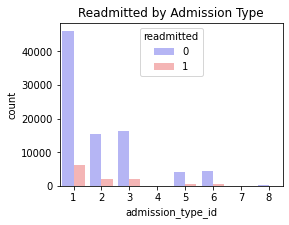

In [ ]:
# display admission type 
# for example: 1-Emergency,	2-Urgent,	3-Elective,	4-Newborn,	5-Not Available,	6-NULL,	7-Trauma,	8-Not Mapped.
f, plot = plt.subplots(figsize=(4, 3))
plot = sns.countplot(x="admission_type_id", data=df, hue="readmitted", palette="bwr")
plot.set_title("Readmitted by Admission Type")
plt.show()

In [ ]:
# encoding admission type
encode_admission_type_id = lambda x: 2 if x == 7 or x == 4 else 5 if x == 6 else 5 if x == 8 else x
df['admission_type_id'] = df['admission_type_id'].map(encode_admission_type_id)

In [ ]:
# display encoded type
df['admission_type_id'].value_counts()

1    52178
3    18193
2    17573
5    10108
Name: admission_type_id, dtype: int64

**Admission Source and Admission Type encoding**

In [ ]:
df['admission_source_id'] = np.where((df['admission_type_id'] ==1) & (df['admission_source_id'] ==4), 1, 
                                  np.where((df['admission_type_id'] ==2) & (df['admission_source_id'] ==4), 2, 
                                  np.where((df['admission_type_id'] ==3) & (df['admission_source_id'] ==4), 3, 
                                  np.where((df['admission_type_id'] ==5) & (df['admission_source_id'] ==4), 3,
                                           df['admission_source_id']))))

df['admission_type_id'] = np.where((df['admission_type_id'] ==5) & (df['admission_source_id'] ==1), 1, 
                                  np.where((df['admission_type_id'] ==5) & (df['admission_source_id'] ==2), 2, 
                                  np.where((df['admission_type_id'] ==5) & (df['admission_source_id'] ==3), 3,
                                           df['admission_type_id'])))

In [ ]:
df['admission_type_id'].replace({1:'Emergency', 2:'Urgent', 3:'Elective'},inplace=True)

**Discharge column**

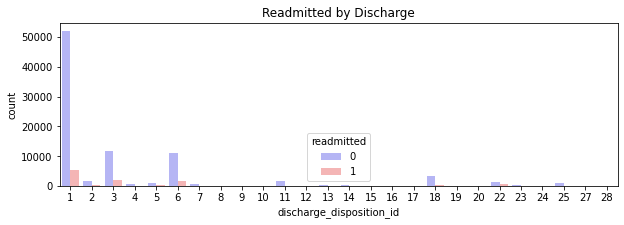

In [ ]:
# display discharge 
f, plot = plt.subplots(figsize=(10, 3))
plot = sns.countplot(x="discharge_disposition_id", data=df, hue="readmitted", palette="bwr")
plot.set_title("Readmitted by Discharge")
plt.show()

In [ ]:
# encoding discharge
home = [1,6,7,8]
HO = [2,3,4,5,16,17]
expired = [11,13,14,19,20,21]
hospital = [9,10,12,15,22,23,24,27,28,29,30]
other = [18,25,26]

encode_discharge_disposition_id = lambda x: 'home' if x in home else 'HO' if x in HO else 'expired' if x in expired else 'hospital' if x in hospital else 'other'
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(encode_discharge_disposition_id)

In [ ]:
# display encoded discharge
df['discharge_disposition_id'].value_counts()

home        70933
HO          17521
other        4565
hospital     2653
expired      2380
Name: discharge_disposition_id, dtype: int64

**Diagnoses columns**

In [ ]:
# the 3 types of diagnosis are: diag_1 - primary, diag_2 - secondary, diag_3 - additional.
# use only primary diagnosis in the model
df = df.drop(['diag_2', 'diag_3'], axis=1)

In [ ]:
# encoding diag_1 column (using ICD codes)
df['diag_1'] = df['diag_1'].str.replace(r'\D', '') 
df['diag_1'] = df['diag_1'].str.replace('250', '2500')
df = df.astype({'diag_1':np.int})

Infectious = range(0,140)
Neoplasms = range(140,240)
Endocrine = range(240,280)
Diabetes = range(2500,251000)
Blood = range(280, 290)
Mental = range(290,320)
Nerve = range(320,390)
Circulatory = range(390,460)
Respiratory = range(460,520)
Digetsive = range(520,580)
Genitourinary =range(580,630)
Pregnancy = range(630,680)
Skin = range(680,710)
Musculoskeleta = range(710,740)
Congenital =range(740,760)
Perinatal =range(760,780)
Symptoms =range(780,800)
Injury =range(800,999)
Other= range(999,2223)

encode_diagnoses = lambda x: 'Infectious' if x in Infectious else 'Neoplasms' if x in Neoplasms else 'Endocrine' if x in Endocrine \
              else 'Diabetes' if x in Diabetes else 'Blood' if x in Blood else 'Mental' if x in Mental \
              else 'Nerve' if x in Nerve else 'Circulatory' if x in Circulatory else 'Respiratory' if x in Respiratory \
              else 'Digetsive' if x in Digetsive else 'Genitourinary' if x in Genitourinary else 'Pregnancy' if x in Pregnancy\
              else 'Skin' if x in Skin else 'Musculoskeleta' if x in Musculoskeleta else 'Congenital' if x in Congenital  \
              else 'Perinatal' if x in Perinatal else 'Symptoms' if x in Symptoms else 'Injury' if x in Injury  \
              else 'Other'

df['diag_1'] = df['diag_1'].map(encode_diagnoses)

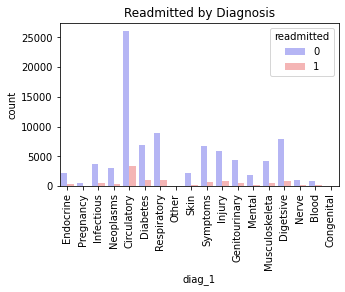

In [ ]:
# display encoded diag_1 
f, plot = plt.subplots(figsize=(5, 3))
plot = sns.countplot(x="diag_1", data=df, hue="readmitted", palette="bwr")
plot.tick_params(axis='x', rotation=90)
plot.set_title("Readmitted by Diagnosis")
plt.show()

**Add Diabetes column**

In [ ]:
df['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [ ]:
df['diag_1'][df['diag_1'] == 'Diabetes'].value_counts()

Diabetes    7965
Name: diag_1, dtype: int64

In [ ]:
# encode diabetes column
def diabetes (row) :
    if row.loc['diag_1'] == 'Diabetes':
        return '1'
    if row.loc['diabetesMed'] == 'Yes':
        return '1'
    else:
        return "0"
df['diag_diabetes'] = df.apply(diabetes, axis=1)

In [ ]:
df['diag_diabetes'].value_counts()

1    76587
0    21465
Name: diag_diabetes, dtype: int64

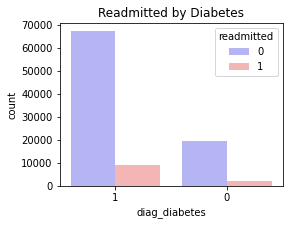

In [ ]:
# display diabetes column
f, plot = plt.subplots(figsize=(4, 3))
plot = sns.countplot(x="diag_diabetes", data=df, hue="readmitted", palette="bwr")
plot.set_title("Readmitted by Diabetes")
plt.show()

**Add number of medication changes column**

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

df['med_changes'] = 0

for col in keys:
    colname = str(col) + 'temp'
    df['med_changes'] = df['med_changes'] + df[colname]
    del df[colname]
    
df['med_changes'].value_counts() 

0    71309
1    25350
2     1281
3      107
4        5
Name: med_changes, dtype: int64

In [ ]:
# encode keys columns
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

**Add number of tests**

In [ ]:
df['tests_amount'] = df['num_lab_procedures'] + df['num_procedures']

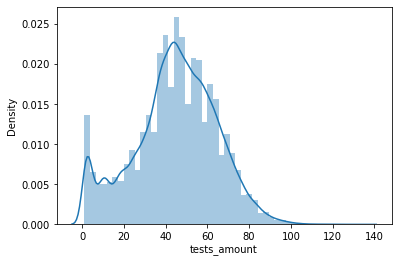

In [ ]:
sns.distplot(df['tests_amount'],kde = True);

**Encode diagnosis column (diag_1)**

In [ ]:
df['diag_1'].unique()

array(['Endocrine', 'Pregnancy', 'Infectious', 'Neoplasms', 'Circulatory',
       'Diabetes', 'Respiratory', 'Other', 'Skin', 'Symptoms', 'Injury',
       'Genitourinary', 'Mental', 'Musculoskeleta', 'Digetsive', 'Nerve',
       'Blood', 'Congenital'], dtype=object)

In [ ]:
df.groupby(['diag_1'])['encounter_id'].count()/len(df)

diag_1
Blood             0.011004
Circulatory       0.301157
Congenital        0.000510
Diabetes          0.081232
Digetsive         0.091054
Endocrine         0.026435
Genitourinary     0.050453
Infectious        0.043742
Injury            0.068097
Mental            0.021876
Musculoskeleta    0.048331
Neoplasms         0.033778
Nerve             0.011932
Other             0.000275
Pregnancy         0.006578
Respiratory       0.102935
Skin              0.024864
Symptoms          0.075746
Name: encounter_id, dtype: float64

In [ ]:
df.replace(to_replace=['Blood', 'Circulatory', 'Congenital', 'Diabetes',
                             'Digetsive','Endocrine', 'Genitourinary', 'Infectious', 'Injury',
                             'Mental', 'Musculoskeleta','Neoplasms', 'Nerve',
                             'Other', 'Pregnancy', 'Respiratory','Skin', 'Symptoms'],
           value= [0.011004, 0.301157, 0.000510, 0.081232, 0.091054, 0.026435, 0.050453, 0.043742,
                   0.068097, 0.021876, 0.048331, 0.033778, 0.011932, 0.000275, 0.006578, 0.102935, 0.024864, 0.075746], 
           inplace=True)      

**Drop columns**

In [ ]:
col_todrop = ['encounter_id', 'patient_nbr','admission_source_id','num_lab_procedures','num_procedures','number_outpatient',
       'number_inpatient','max_glu_serum', 'A1Cresult','repaglinide', 'nateglinide','diag_1', 'number_emergency',
       'chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
       'change','number_diagnoses', 'diabetesMed']

In [ ]:
df_new = df.drop(col_todrop, axis =1).copy()
df_new.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_medications,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,readmitted,diag_diabetes,med_changes,tests_amount
1,0.77,Female,15,Emergency,home,3,18,0,0,0,0,0,0,1,0,1,1,59
2,0.19,Female,25,Emergency,home,2,13,0,0,1,0,0,0,0,0,1,0,16
3,0.77,Male,35,Emergency,home,2,16,0,0,0,0,0,0,1,0,1,1,45
4,0.77,Male,45,Emergency,home,1,8,0,0,1,0,0,0,1,0,1,0,51
5,0.77,Male,55,Urgent,home,3,16,0,0,0,0,0,0,1,0,1,0,37


**Creat dummy variables**

In [ ]:
df_new = pd.get_dummies(df_new)

# **Data Optimization Pre-Modeling**

**Split the dataset**

In [ ]:
# declare feature vector and target variable
X = df_new.drop('readmitted', axis=1)
y = df_new['readmitted']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

**Balance the dataset**

In [ ]:
# check the balance of the dataset
df_new['readmitted'].value_counts()

0    86986
1    11066
Name: readmitted, dtype: int64

In [ ]:
# balance the dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

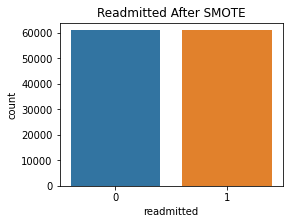

In [ ]:
# verify the dataset is balanced 
plt.figure(figsize = (4, 3))
sns.countplot(y_train) 
plt.title('Readmitted After SMOTE')
plt.show()

**Features Scaling**

In [ ]:
X_train['age']=X_train['age']/100

In [ ]:
scale_cols = ['time_in_hospital','num_medications','tests_amount']

In [ ]:
scaler = MinMaxScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols].values)

In [ ]:
X_train.describe()

,race,age,time_in_hospital,num_medications,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,...,admission_type_id_Elective,admission_type_id_Emergency,admission_type_id_Urgent,discharge_disposition_id_HO,discharge_disposition_id_expired,discharge_disposition_id_home,discharge_disposition_id_hospital,discharge_disposition_id_other,diag_diabetes_0,diag_diabetes_1
count,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,...,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000,121580.000000
mean,0.628927,0.664671,0.261844,0.191429,0.126863,0.030819,0.080268,0.066105,0.044226,0.037934,...,0.177611,0.496282,0.141142,0.144152,0.013785,0.628072,0.017914,0.027743,0.154022,0.756769
std,0.241571,0.155430,0.225078,0.100243,0.332821,0.172828,0.271709,0.248466,0.205598,0.191037,...,0.382187,0.499988,0.348169,0.351245,0.116599,0.483321,0.132640,0.164236,0.360971,0.429035
min,0.010000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.548581,0.550000,0.076923,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.770000,0.650000,0.230769,0.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.770000,0.750000,0.384615,0.237500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,0.770000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Features Selection**

In [ ]:
len(X_train.columns)

25

In [ ]:
# Create a function that choose a subset of the existing features which are the most "important":

def get_best_features(X_train, y_train, num_of_features, features_names):
  selector = SelectKBest(score_func=f_classif, k=num_of_features) # initiate the transformer 
  fit = selector.fit_transform(X_train, y_train) # fit it to our data
  mask = selector.get_support() # list of booleans (i.e. if the features under/above threshold (true/false))
  new_features = [] # list of K best features

  for bool, feature in zip(mask, features_names):
    if bool:
      new_features.append(feature)
  return pd.DataFrame(X_train, columns=new_features)

In [ ]:
features_names = list(X_train.columns)

In [ ]:
# display new dataset with the new columns (i.e. the best features)
X_train_k_sel = get_best_features(X_train,y_train,10,features_names)
X_train_k_sel.head()

,metformin,glipizide,glyburide,pioglitazone,gender_Female,gender_Male,admission_type_id_Elective,admission_type_id_Urgent,discharge_disposition_id_home,diag_diabetes_0
0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,1,1,0,1,0
4,0,0,0,0,1,0,1,0,1,0


In [ ]:
# display the portion of best features out of total columns
len(X_train_k_sel.columns)/len(X_train.columns)

0.4

#**Scoring Function (Pre-Modeing)**

In [ ]:
# create scores dataframe 
title = ['Accuracy Score','f1']
df_pred = pd.DataFrame(columns=title) 

# create function that add scores results to dataframe
def append_row(df_pred,index_name,data):
  df_pred.loc[index_name] = data

# **Modeling**

# **Logistic Regression**

**Modeling and Scoring**

In [ ]:
# instantiate the model 
lgr = LogisticRegression(C=3)
# fit
lgr.fit(X_train, y_train)

LogisticRegression(C=3)

In [ ]:
# predict with the model
y_pred = lgr.predict(X_test)
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'lgr',(acc,f1))

acc

0.10953222735926027

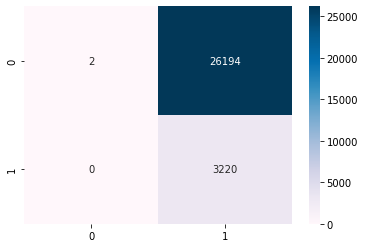

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=lgr.classes_,
             columns=lgr.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     26196
           1       0.11      1.00      0.20      3220

    accuracy                           0.11     29416
   macro avg       0.55      0.50      0.10     29416
weighted avg       0.90      0.11      0.02     29416



# **Logistic Regression (with Feature Selection and Grid Search)**

In [ ]:
parameter_candidates = [{'C': [0.1, 1, 40, 100], 'solver':['newton-cg', 'lbfgs', 'saga']}]

In [ ]:
# instantiate the model 
lgr_fs_gs = GridSearchCV(LogisticRegression(), parameter_candidates, cv=3, verbose=0)
# fit
lgr_fs_gs.fit(X_train_k_sel, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 40, 100],
                          'solver': ['newton-cg', 'lbfgs', 'saga']}])

In [ ]:
# display best model
print("Best parameters:", lgr_fs_gs.best_params_)

Best parameters: {'C': 1, 'solver': 'newton-cg'}


In [ ]:
# initiate best model
best_lgr = lgr_fs_gs.best_estimator_

In [ ]:
# predict with the model
y_pred = best_lgr.predict(X_test[list(X_train_k_sel.columns)])
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'lgr_fs_gs',(acc,f1))

acc

0.7100557519717161

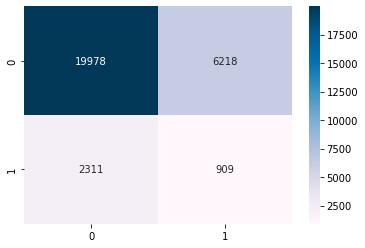

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=best_lgr.classes_,
             columns=best_lgr.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

In [ ]:
print(classification_report(y_test,
                            y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82     26196
           1       0.13      0.28      0.18      3220

    accuracy                           0.71     29416
   macro avg       0.51      0.52      0.50     29416
weighted avg       0.81      0.71      0.75     29416



# **DecisionTreeClassifier**

In [ ]:
# instantiate the classifier 
dt = DecisionTreeClassifier(max_depth=5)
# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# predict with the model
y_pred = dt.predict(X_test)
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'dt',(acc,f1))

acc

0.641657601305412

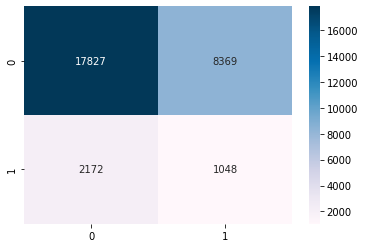

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=dt.classes_,
             columns=dt.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     26196
           1       0.11      0.33      0.17      3220

    accuracy                           0.64     29416
   macro avg       0.50      0.50      0.47     29416
weighted avg       0.81      0.64      0.71     29416



# **DecisionTreeClassifier (with Feature Selection and Grid Search)**

In [ ]:
parameter_candidates = [{'min_samples_split': [20,10,30], 'max_depth': [3, 5],'max_leaf_nodes':[6,14]}]

In [ ]:
# instantiate the model 
dt_fs_gs = GridSearchCV(DecisionTreeClassifier(), parameter_candidates, cv=5)
# fit
dt_fs_gs.fit(X_train_k_sel, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 5], 'max_leaf_nodes': [6, 14],
                          'min_samples_split': [20, 10, 30]}])

In [ ]:
# display best model
print("Best parameters:", dt_fs_gs.best_params_)

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_split': 20}


In [ ]:
# initiate best model
best_dt = dt_fs_gs.best_estimator_

In [ ]:
# predict with the model
y_pred = best_dt.predict(X_test[list(X_train_k_sel.columns)])
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'dt_fs_gs',(acc,f1))

acc

0.5738373674190916

              precision    recall  f1-score   support

           0       0.90      0.59      0.71     26196
           1       0.12      0.46      0.19      3220

    accuracy                           0.57     29416
   macro avg       0.51      0.52      0.45     29416
weighted avg       0.81      0.57      0.65     29416



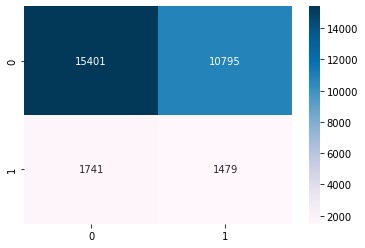

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=best_dt.classes_,
             columns=best_dt.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

print(classification_report(y_test,y_pred))

# **Random Forest Classifier**

In [ ]:
# instantiate the model 
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict with the model
y_pred = rfc.predict(X_test)
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'rfc',(acc,f1))

acc

0.8302964373130269

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     26196
           1       0.13      0.10      0.12      3220

    accuracy                           0.83     29416
   macro avg       0.51      0.51      0.51     29416
weighted avg       0.81      0.83      0.82     29416



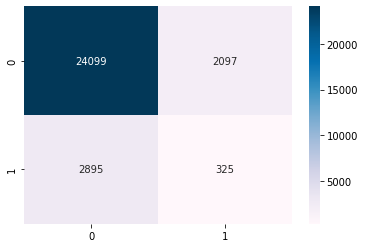

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=rfc.classes_,
             columns=rfc.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

print(classification_report(y_test,y_pred))

# **Random Forest Classifier (with Feature Selection and Grid Search)**

In [ ]:
parameter_candidates = [{'max_leaf_nodes': [900,1100,1300], 'max_samples': [0.5,0.6],'min_samples_leaf':[100,150]}]

In [ ]:
# instantiate the model 
rfc_fs_gs = GridSearchCV(RandomForestClassifier(), parameter_candidates, cv=5)
# fit
rfc_fs_gs.fit(X_train_k_sel, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_leaf_nodes': [900, 1100, 1300],
                          'max_samples': [0.5, 0.6],
                          'min_samples_leaf': [100, 150]}])

In [ ]:
# display best model
print("Best parameters:", rfc_fs_gs.best_params_)

Best parameters: {'max_leaf_nodes': 900, 'max_samples': 0.6, 'min_samples_leaf': 100}


In [ ]:
# initiate best model
best_rfc = rfc_fs_gs.best_estimator_

In [ ]:
# predict with the model
y_pred = best_rfc.predict(X_test[list(X_train_k_sel.columns)])
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'rfc_fs_gs',(acc,f1))

acc

0.7083899918411749

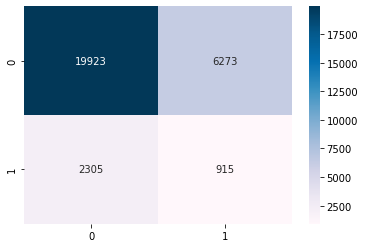

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=best_rfc.classes_,
             columns=best_rfc.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

# **Ensemble Methods**

**Voting**

In [ ]:
# 3 models
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = RandomForestClassifier()

# instantiate voting model
clf_voting = VotingClassifier(estimators=[('LR', clf1), ('DT', clf2), ('RFC', clf3)], voting='soft')

In [ ]:
# fit
clf_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('RFC', RandomForestClassifier())],
                 voting='soft')

In [ ]:
# display score of each model
clf_voting.estimators_

[LogisticRegression(),
 DecisionTreeClassifier(max_depth=5),
 RandomForestClassifier()]

In [ ]:
# predict with the model
y_pred = clf_voting.predict(X_test)

In [ ]:
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'clf_voting',(acc,f1))

acc

0.46379521348925756

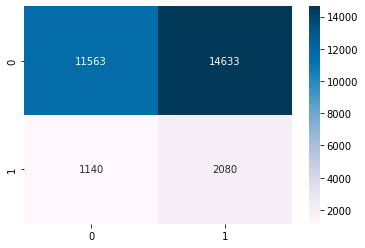

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=clf_voting.classes_,
             columns=clf_voting.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

**Voting (with best models)**

In [ ]:
# 3 models
clf1 = best_lgr
clf2 = best_dt
clf3 = best_rfc

# instantiate voting model
best_clf_voting = VotingClassifier(estimators=[('LR', clf1), ('DT', clf2), ('RFC', clf3)], voting='soft')

In [ ]:
# fit
best_clf_voting.fit(X_train_k_sel, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1, solver='newton-cg')),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_leaf_nodes=14,
                                                     min_samples_split=20)),
                             ('RFC',
                              RandomForestClassifier(max_leaf_nodes=900,
                                                     max_samples=0.6,
                                                     min_samples_leaf=100))],
                 voting='soft')

In [ ]:
# display score of each model
best_clf_voting.estimators_

[LogisticRegression(C=1, solver='newton-cg'),
 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, min_samples_split=20),
 RandomForestClassifier(max_leaf_nodes=900, max_samples=0.6,
                        min_samples_leaf=100)]

In [ ]:
# predict with the model
y_pred = best_clf_voting.predict(X_test[list(X_train_k_sel.columns)])

In [ ]:
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'best_clf_voting',(acc,f1))

acc

0.6981914604296982

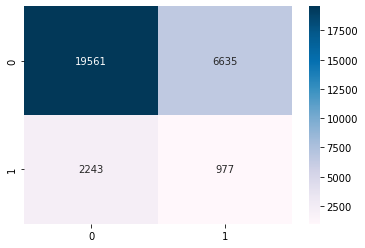

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=best_clf_voting.classes_,
             columns=best_clf_voting.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

**Boosting with AdaBoost**

In [ ]:
# decision tree as a base model
clf_base = DecisionTreeClassifier(class_weight='balanced')

# create AdaBoost model
clf_adaboost = AdaBoostClassifier(base_estimator=clf_base, n_estimators=200, learning_rate=0.01)

In [ ]:
# fit AdaBoost model
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.01, n_estimators=200)

In [ ]:
# predict with the model
y_pred = clf_adaboost.predict(X_test)

In [ ]:
# score the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# add scores results to dataframe
append_row(df_pred,'clf_adaboost',(acc,f1))

acc

0.548239053576285

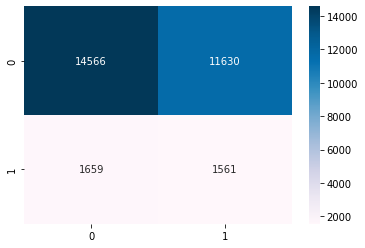

In [ ]:
cm = confusion_matrix(y_test,y_pred)
pd.DataFrame(cm,
             index=clf_adaboost.classes_,
             columns=clf_adaboost.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

# **Scoring Visualization**

In [ ]:
df_pred

,Accuracy Score,f1
lgr,0.109532,0.197340
lgr_fs_gs,0.710056,0.175703
dt,0.641658,0.165862
dt_fs_gs,0.573837,0.190913
rfc,0.830296,0.115207
rfc_fs_gs,0.708390,0.175826
clf_voting,0.463795,0.208699
best_clf_voting,0.698191,0.180391
clf_adaboost,0.548239,0.190238


Text(0, 0.5, 'Score')

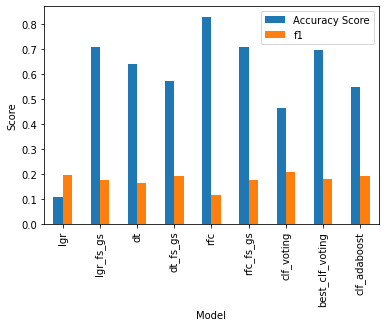

In [ ]:
plot = df_pred.rename_axis(index='Model').plot.bar()
plot.set_ylabel('Score')

## **Results and Conclusions**

1. In this project, in order to predict whether a patient will be readmitted in some hospital, I built 9 models.
2. The effect of optimizing the models (features selection + grid search) on the score, surprisingly, is not unequivocal:
 * For lgr and voting - we can see an increase in accuracy score and a slight decrease in f1 score.
 * For dt and rfc - we see the opposite result.
3. Training the model only on portion of the columns (features selection), resulted in the most significant increase of score - in the logistic regression model.
4. Confusion matrix and classification report are attached as well to visualize the models performance.
5. The best performing model with the highest accuracy is - Random Forest Classifier.

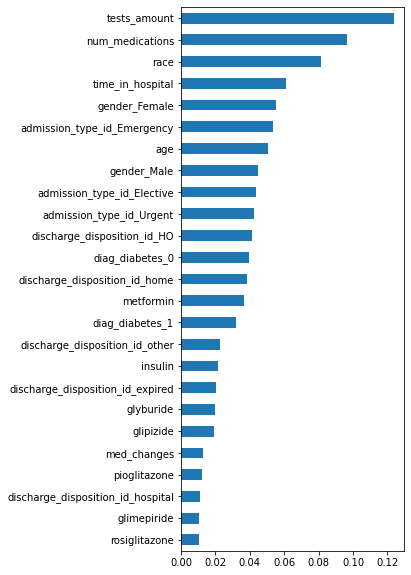

In [ ]:
# features importance of the best model (Random Forest Classifier)
pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(4, 10), rot=0)